In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/kaggle/input/impact-of-covid-19-on-working-professionals/synthetic_covid_impact_on_work.csv')
df.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,1,6.392394,2.684594,1,Low,0,0,1,1,1,0,1,Retail,1
1,1,1,9.171984,3.339225,1,Low,0,1,0,1,1,0,1,IT,1
2,1,0,10.612561,2.218333,0,Medium,0,0,0,0,0,0,0,Retail,1
3,1,1,5.546169,5.150566,0,Medium,0,0,0,1,0,0,0,Education,1
4,0,1,11.424615,3.121126,1,Medium,0,1,1,1,0,1,1,Education,1


In [4]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Increased_Work_Hours             0
Work_From_Home                   0
Hours_Worked_Per_Day             0
Meetings_Per_Day                 0
Productivity_Change              0
Stress_Level                     0
Health_Issue                     0
Job_Security                     0
Childcare_Responsibilities       0
Commuting_Changes                0
Technology_Adaptation            0
Salary_Changes                   0
Team_Collaboration_Challenges    0
Sector                           0
Affected_by_Covid                0
dtype: int64


In [5]:
summary = df.describe()

print(summary)

       Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
count          10000.000000    10000.000000          10000.000000   
mean               0.676900        0.803300              8.006538   
std                0.467684        0.397523              1.978468   
min                0.000000        0.000000              0.287249   
25%                0.000000        1.000000              6.648484   
50%                1.000000        1.000000              8.010864   
75%                1.000000        1.000000              9.348860   
max                1.000000        1.000000             16.958169   

       Meetings_Per_Day  Productivity_Change  Health_Issue  Job_Security  \
count      10000.000000          10000.00000  10000.000000  10000.000000   
mean           3.976717              0.50220      0.301100      0.404900   
std            1.521594              0.50002      0.458759      0.490897   
min           -2.698406              0.00000      0.000000      0.000000  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


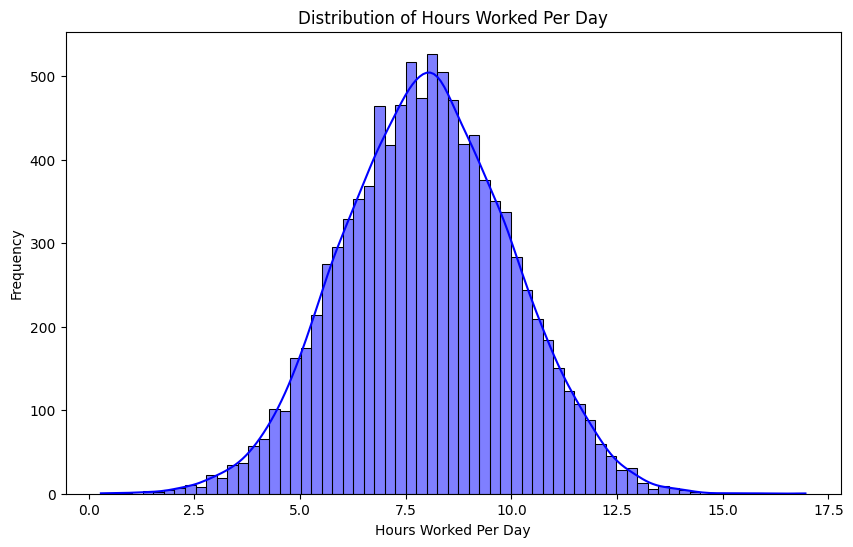

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Hours_Worked_Per_Day'], kde=True, color='blue')
plt.title('Distribution of Hours Worked Per Day')
plt.xlabel('Hours Worked Per Day')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


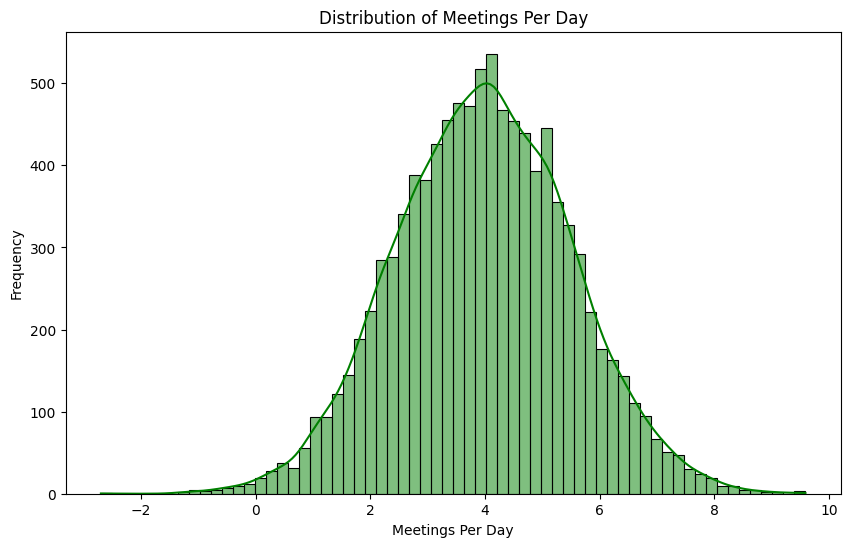

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Meetings_Per_Day'], kde=True, color='green')
plt.title('Distribution of Meetings Per Day')
plt.xlabel('Meetings Per Day')
plt.ylabel('Frequency')
plt.show()

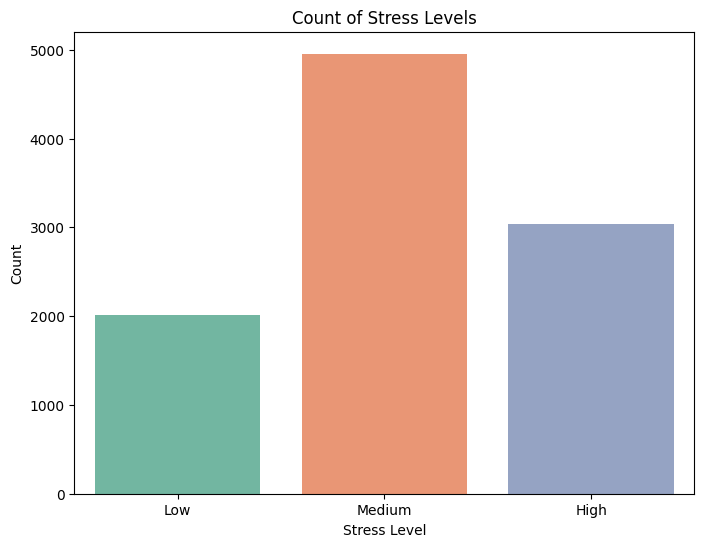

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress_Level', data=df, palette='Set2')
plt.title('Count of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

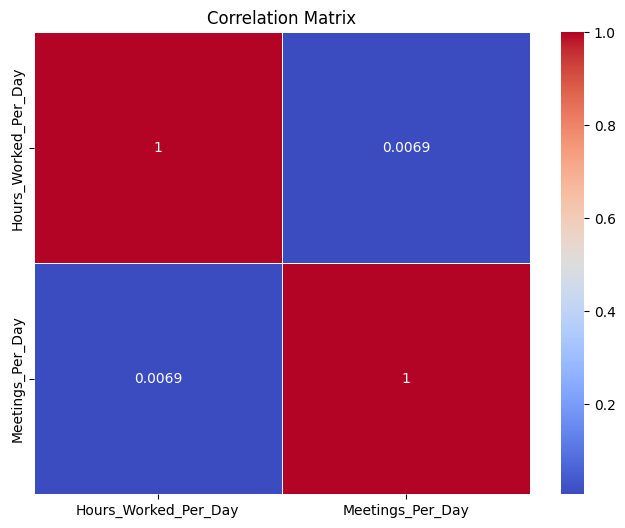

In [9]:
correlation_matrix = df[['Hours_Worked_Per_Day', 'Meetings_Per_Day']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


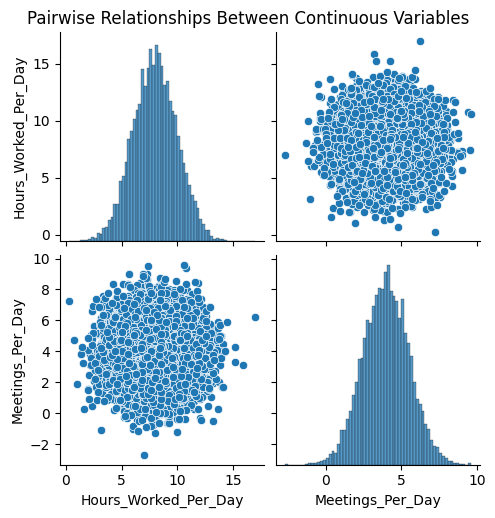

In [10]:
sns.pairplot(df[['Hours_Worked_Per_Day', 'Meetings_Per_Day']])
plt.suptitle('Pairwise Relationships Between Continuous Variables', y=1.02)
plt.show()

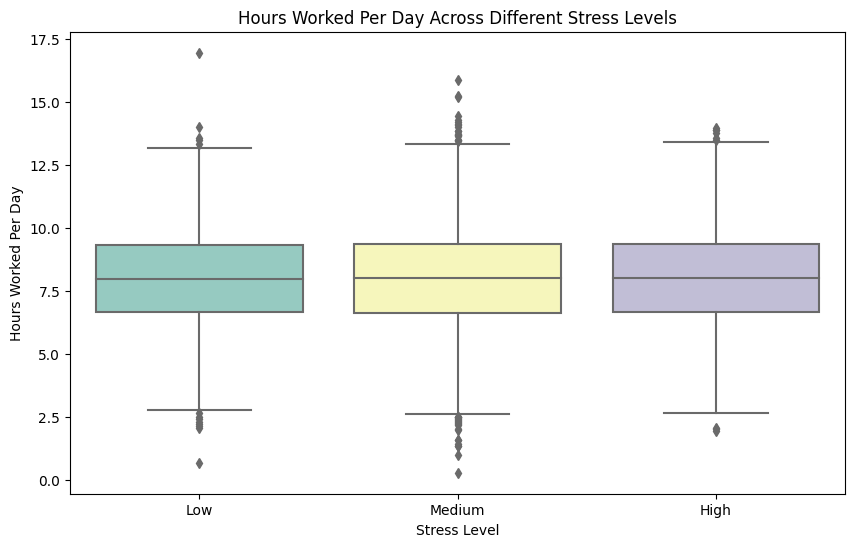

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Hours_Worked_Per_Day', data=df, palette='Set3')
plt.title('Hours Worked Per Day Across Different Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Hours Worked Per Day')
plt.show()

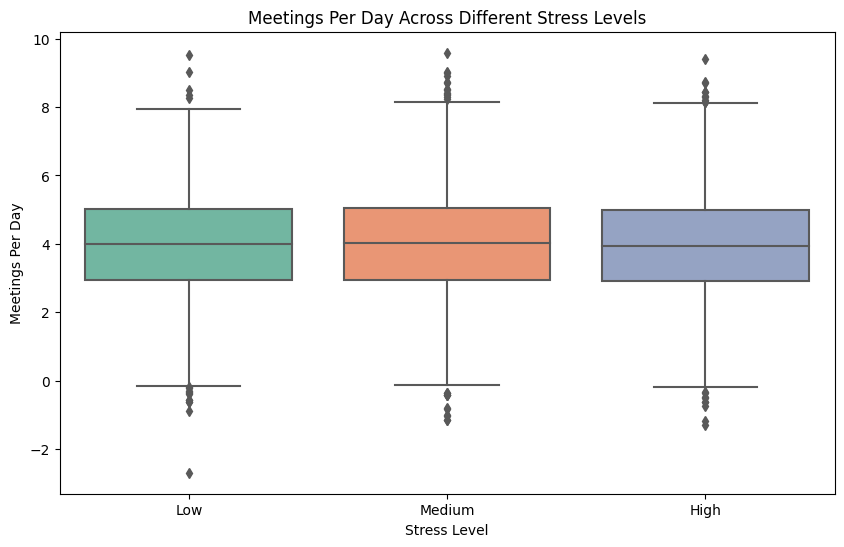

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Meetings_Per_Day', data=df, palette='Set2')
plt.title('Meetings Per Day Across Different Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Meetings Per Day')
plt.show()

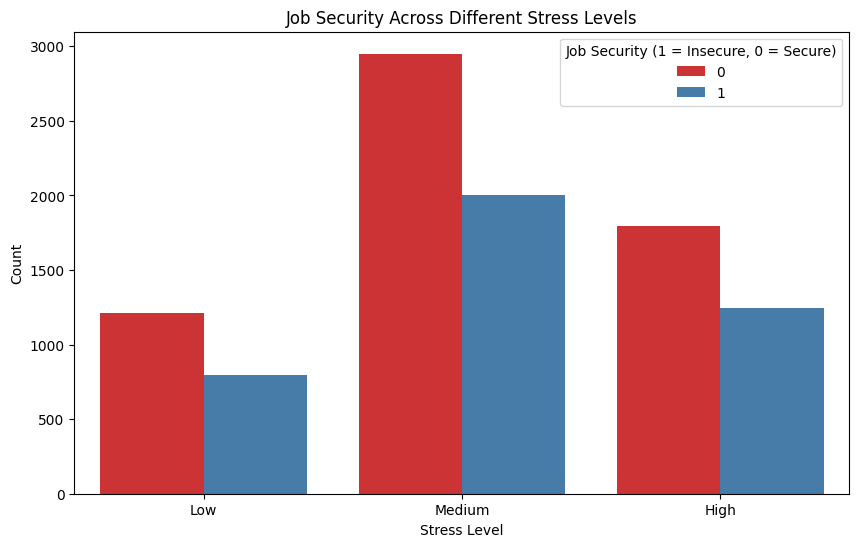

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress_Level', hue='Job_Security', data=df, palette='Set1')
plt.title('Job Security Across Different Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Job Security (1 = Insecure, 0 = Secure)')
plt.show()

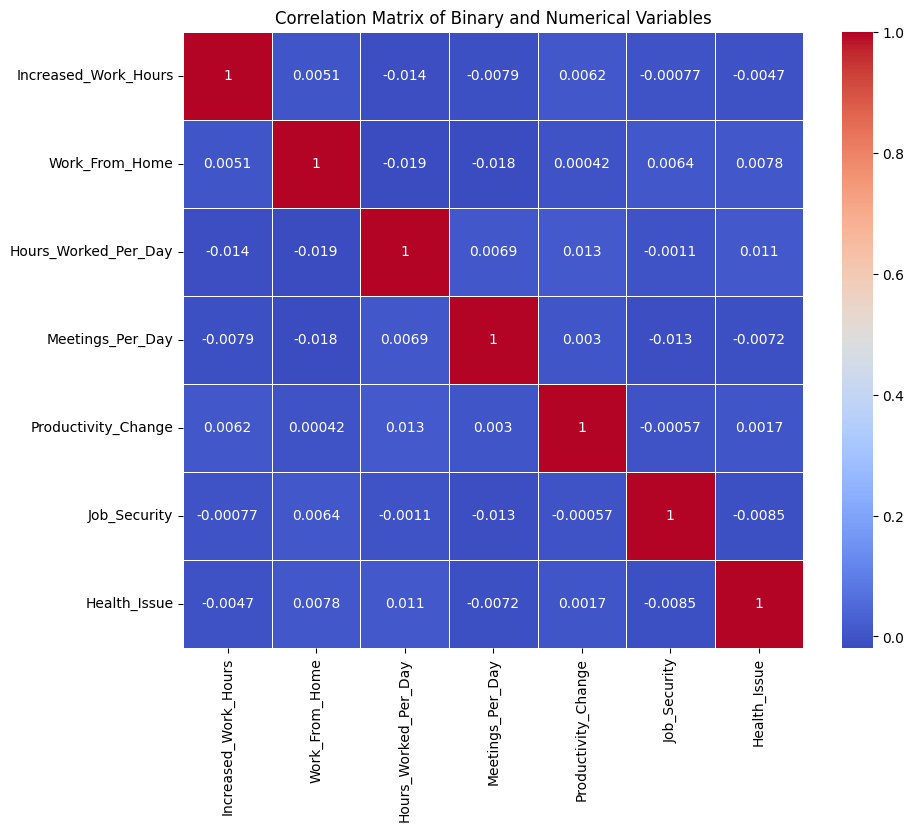

In [14]:
correlation_matrix = df[['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day',
                         'Meetings_Per_Day', 'Productivity_Change', 'Job_Security', 'Health_Issue']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Binary and Numerical Variables')
plt.show()

In [17]:
le = LabelEncoder()
df['Stress_Level'] = le.fit_transform(df['Stress_Level'])
df['Sector'] = le.fit_transform(df['Sector'])

In [18]:
X = df[['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day', 'Meetings_Per_Day', 
        'Productivity_Change', 'Stress_Level', 'Health_Issue', 'Technology_Adaptation', 'Sector']]
y = df['Job_Security']  

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 9) (2000, 9) (8000,) (2000,)


In [22]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred_logreg = logreg.predict(X_test)

In [25]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.5785
Confusion Matrix:
 [[1157    0]
 [ 843    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      1.00      0.73      1157
           1       0.00      0.00      0.00       843

    accuracy                           0.58      2000
   macro avg       0.29      0.50      0.37      2000
weighted avg       0.33      0.58      0.42      2000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
y_pred_tree = tree.predict(X_test)

In [29]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.5085
Confusion Matrix:
 [[655 502]
 [481 362]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.57      0.57      1157
           1       0.42      0.43      0.42       843

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.51      0.51      0.51      2000



In [30]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred_rf = rf.predict(X_test)

In [32]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.538
Confusion Matrix:
 [[855 302]
 [622 221]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.74      0.65      1157
           1       0.42      0.26      0.32       843

    accuracy                           0.54      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.51      0.54      0.51      2000



In [33]:
feature_names = ['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day', 
                 'Meetings_Per_Day', 'Productivity_Change', 'Stress_Level', 
                 'Health_Issue', 'Technology_Adaptation', 'Sector']

In [34]:
importances = rf.feature_importances_

In [35]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [36]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [37]:
print(feature_importance_df)

                 Feature  Importance
2   Hours_Worked_Per_Day    0.399383
3       Meetings_Per_Day    0.392448
8                 Sector    0.057468
5           Stress_Level    0.039135
0   Increased_Work_Hours    0.024242
6           Health_Issue    0.024083
4    Productivity_Change    0.023487
7  Technology_Adaptation    0.019982
1         Work_From_Home    0.019772


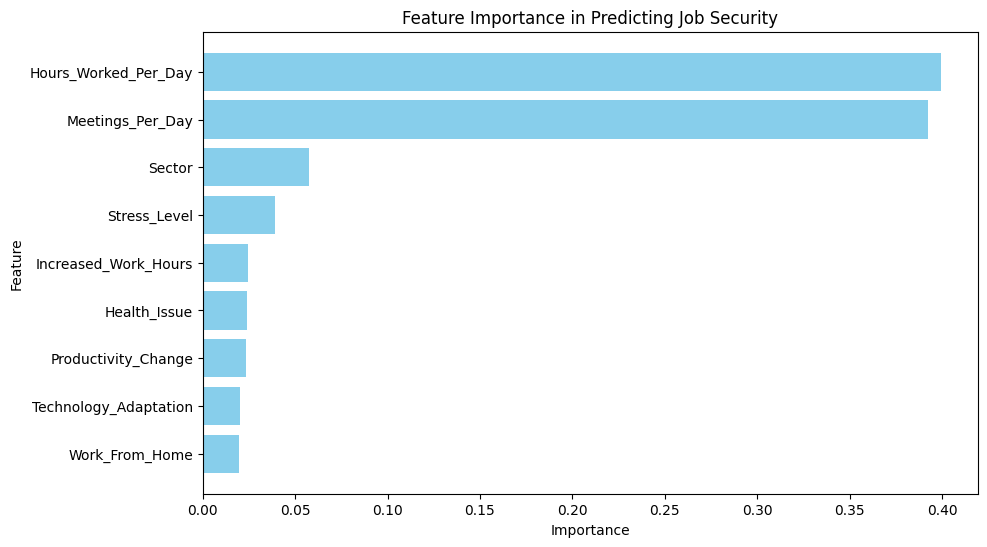

In [38]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Job Security')
plt.gca().invert_yaxis()  
plt.show()

In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],           
    'max_depth': [10, 20, 30, None],           
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'bootstrap': [True, False]                 
}

In [41]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   3.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.2s

In [42]:
best_rf = grid_search.best_estimator_

In [43]:
y_pred_best_rf = best_rf.predict(X_test)

In [44]:
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Optimized Random Forest Accuracy: 0.5765
Confusion Matrix:
 [[1130   27]
 [ 820   23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.98      0.73      1157
           1       0.46      0.03      0.05       843

    accuracy                           0.58      2000
   macro avg       0.52      0.50      0.39      2000
weighted avg       0.53      0.58      0.44      2000

